# Wednesday morning

https://learning.nceas.ucsb.edu/2024-03-arctic/sections/geopandas.html

## Preprocessing the raster data


In [1]:
import urllib

url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A6b847ab0-9a3d-4534-bf28-3a96c5fa8d72'

# Ship traffic raster from Aug 2020, of a coastal subset of data w 1 km resolution
msg = urllib.request.urlretrieve(url, "Coastal_2020_08.tif")

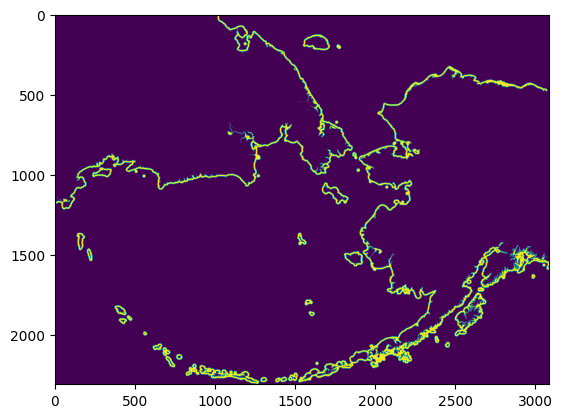

In [3]:
import rasterio
import matplotlib.pyplot as plt
import rasterio.mask
import numpy as np
import rasterio.plot

with rasterio.open("Coastal_2020_08.tif") as ship_con:
    # Read in just the first band of the raster
    ships = ship_con.read(1)
    # save the metadata too
    ships_meta = ship_con.profile

plt.imshow(ships)


In [4]:
print(ships_meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 3087, 'height': 2308, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(999.7994153462766, 0.0, -2550153.29233849,
       0.0, -999.9687691991521, 2711703.104608573), 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [5]:
type(ships_meta)

rasterio.profiles.Profile